In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pylab
import pywt

# Create parameter-based signal A

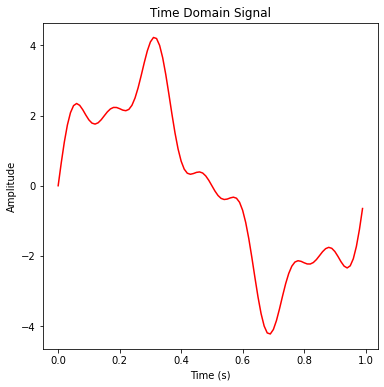

In [2]:

# sampling rate
sr = 100
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (6, 6))
plt.plot(t, x, 'r')
plt.title ('Time Domain Signal')
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')

plt.savefig("signal_A.jpg", dpi=250)
plt.show()



# Perform Discrete Fourier Transform (DFT) on signal A

In [3]:
#ref:https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.02-Discrete-Fourier-Transform.html

In [4]:
def DFT(x):
    """
    Function to calculate the 
    discrete Fourier Transform 
    of a 1D real-valued signal x
    """

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    
    X = np.dot(e, x)
    
    return X

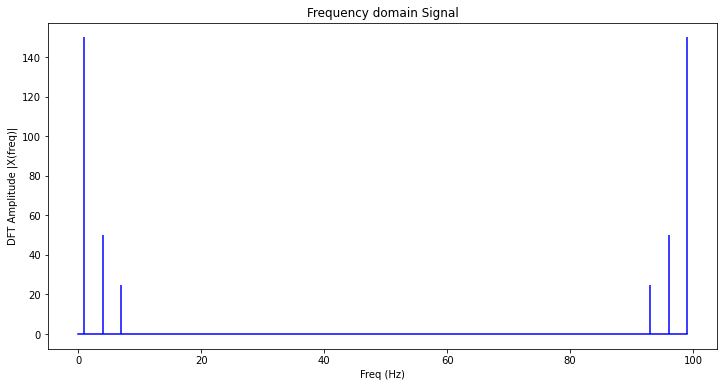

In [5]:
X = DFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.title('Frequency domain Signal')
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.show()

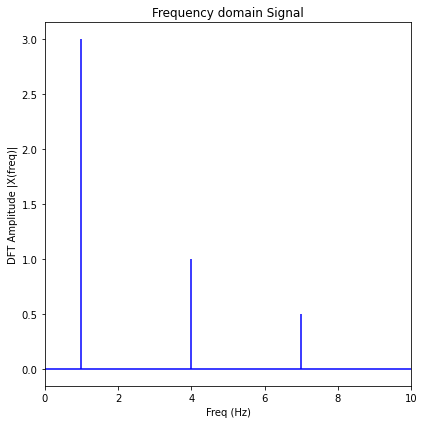

In [6]:
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.figure(figsize = (6, 6))

plt.ylabel('DFT Amplitude |X(freq)|')

plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.title('Frequency domain Signal')
plt.xlim(0, 10)
plt.tight_layout()
plt.savefig("signal_A_Frequency_domain.jpg", dpi=250)

plt.show()

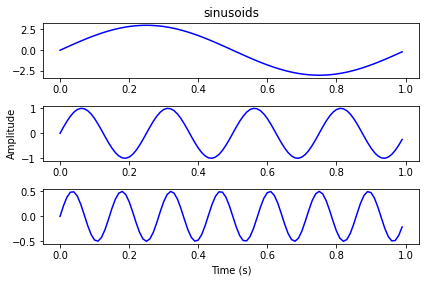

In [7]:
#create sinusoids base on Frequency domain Signal graph

sample_rate = 100
start_time = 0
end_time = 1

time = np.arange(start_time, end_time, 1/sample_rate)
frequency = 1
amplitude = 3
theta = 0
sinewave_1 = amplitude * np.sin(2 * np.pi * frequency * time + theta)

frequency = 4
amplitude = 1
theta = 0
sinewave_2 = amplitude * np.sin(2 * np.pi * frequency * time + theta)

frequency = 7
amplitude = 0.5
theta = 0
sinewave_3 = amplitude * np.sin(2 * np.pi * frequency * time + theta)

#draw sinusoids graph

plt.subplot(3,1,1)
plt.plot(t, sinewave_1,'b')
plt.title ('sinusoids')


plt.subplot(3, 1, 2)


plt.plot(t, sinewave_2,'b')

plt.ylabel('Amplitude')


plt.subplot(3, 1, 3)
plt.plot(t, sinewave_3,'b')
plt.xlabel('Time (s)')

plt. tight_layout(pad=1.0)
plt.savefig("signal_A_sinusoids.jpg", dpi=250)
plt.show()



In [7]:

# Wavelet examples
#! pip install PyWavelets
#!pip install scaleogram


In [27]:
from scipy import signal
import matplotlib.pyplot as plt

M = 100
s = 4.0
w = 2.0
#125, w=5.0, s=1.0, complete=True)
wavelet = signal.morlet2(M, s, w)
plt.plot(abs(wavelet))
plt.show()

UsageError: Cell magic `%%` not found.


# Convert signal A into Haar wavelets.

In [8]:
mode = pywt.Modes.smooth

def plot_signal_decomp(data, w, title):
    """Decompose and plot a signal S.
    S = An + Dn + Dn-1 + ... + D1
    """
    w = pywt.Wavelet(w)
    a = data
    ca = []
    cd = []
    for i in range(5):
        (a, d) = pywt.dwt(a, w, mode)
        ca.append(a)
        cd.append(d)

    rec_a = []
    rec_d = []

    for i, coeff in enumerate(ca):
        coeff_list = [coeff, None] + [None] * i
        rec_a.append(pywt.waverec(coeff_list, w))

    for i, coeff in enumerate(cd):
        coeff_list = [None, coeff] + [None] * i
        rec_d.append(pywt.waverec(coeff_list, w))

    fig = plt.figure(figsize=(20,10))

    
    ax_main = fig.add_subplot(len(rec_a) + 1, 2, 1)
    
    fig.suptitle(title, fontsize=20)

    ax_main.set_title('Original signal')
    ax_main.plot(data, 'r')

    ax_main.set_xlim(0, len(data) - 1)
    for i, y in enumerate(rec_a):
        ax = fig.add_subplot(len(rec_a) + 1, 2, 3 + i * 2)
        ax.plot(y, 'b')
        ax.set_xlim(0, len(y) - 1)
        ax.set_ylabel("A%d" % (i + 1))

    for i, y in enumerate(rec_d):
        ax = fig.add_subplot(len(rec_d) + 1, 2, 4 + i * 2)
        ax.plot(y, 'g')
        ax.set_xlim(0, len(y) - 1)
        ax.set_ylabel("D%d" % (i + 1))
    plt.savefig("Haar_with_signal_A.jpg", dpi=250)


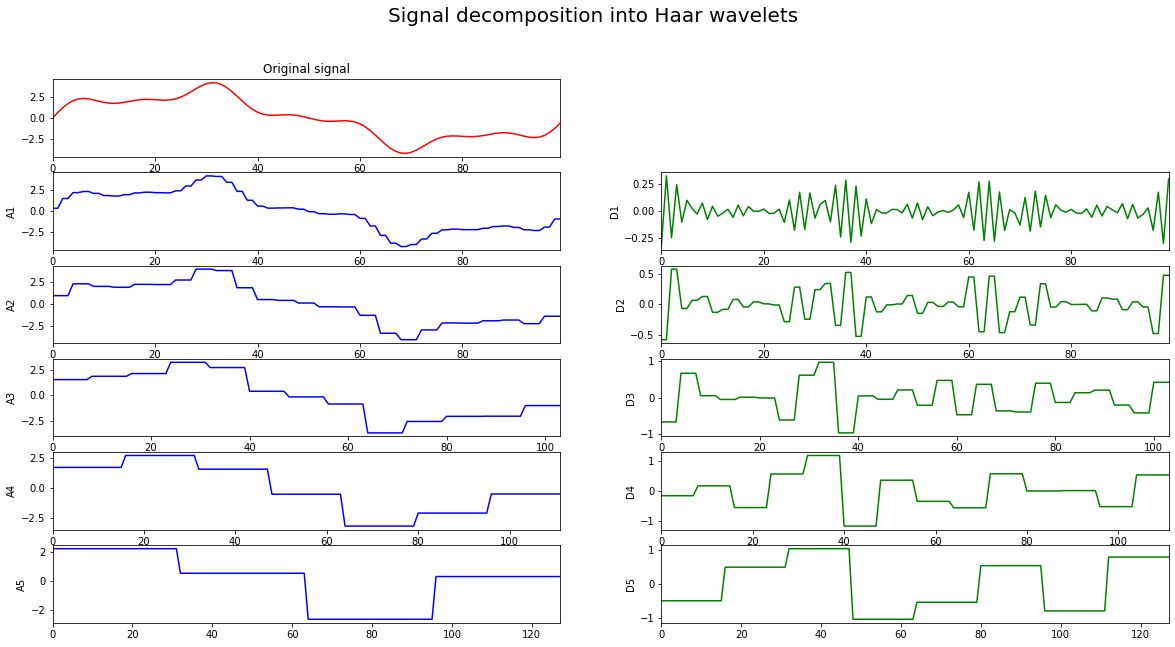

In [9]:
plot_signal_decomp(x, 'haar', "Signal decomposition into Haar wavelets")


In [ ]:
#ref: https://github.com/PyWavelets/pywt/blob/master/demo/dwt_signal_decomposition.py 

In [34]:
mode = pywt.Modes.smooth

def plot_signal_decomp2(data, w, title):
    """Decompose and plot a signal S.
    S = An + Dn + Dn-1 + ... + D1
    """
    w = pywt.Wavelet(w)
    a = data
    ca = []
    
    for i in range(5):
        (a, d) = pywt.dwt(a, w, mode)
        ca.append(a)
        

    rec_a = []
    

    for i, coeff in enumerate(ca):
        coeff_list = [coeff, None] + [None] * i
        rec_a.append(pywt.waverec(coeff_list, w))



    fig = plt.figure(figsize=(20,10))

    
    ax_main = fig.add_subplot(len(rec_a) + 1, 2, 1)
    
    #fig.suptitle(title, fontsize=20)

    ax_main.set_title(title, fontsize=20)
    ax_main.set_ylabel('Original signal')
    ax_main.plot(data, 'r')

    ax_main.set_xlim(0, len(data) - 1)
    for i, y in enumerate(rec_a):
        ax = fig.add_subplot(len(rec_a) + 1, 2, 3 + i * 2)
        ax.plot(y, 'b')
        ax.set_xlim(0, len(y) - 1)
        ax.set_ylabel("A%d" % (i + 1))
    plt.savefig("Haar_with_signal_A.jpg", dpi=250)


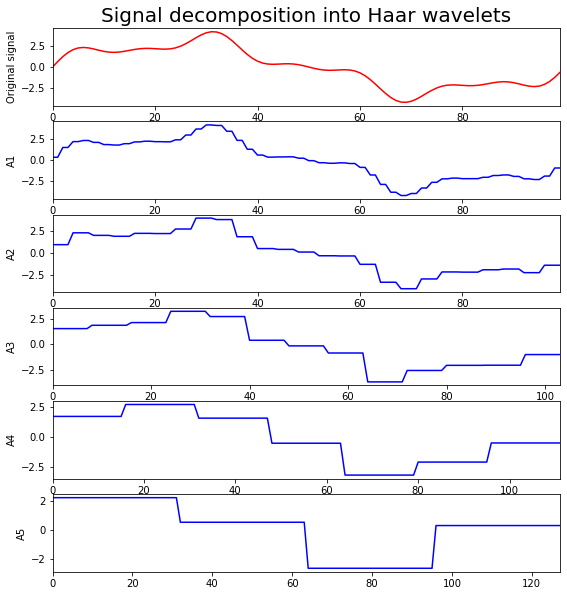

In [35]:
plot_signal_decomp2(x, 'haar', "Signal decomposition into Haar wavelets")
